# Compare the correlations for same kOn_Target when rAdd is varying independently


In [10]:
import pandas as pd
import os
import numpy as np
from scipy.stats import spearmanr
from tqdm.notebook import tqdm

In [77]:
#Parameter sheet
parameter_sheet_saturation = pd.read_csv('/home/mzo5929/Keerthana/grnInference/simulationData/parameter_sweep_radd_k_on_target_potential_saturation.csv', index_col=0)
parameter_sheet = pd.read_csv('/home/mzo5929/Keerthana/grnInference/simulationData/parameter_sweep_radd_k_on_target.csv', index_col=0)
folder_simulations = "/home/mzo5929/Keerthana/grnInference/simulationData/large_scale_parameter_scan/radd_decoupled_from_kon/"
folder_simulations_saturation = "/home/mzo5929/Keerthana/grnInference/simulationData/large_scale_parameter_scan/radd_decoupled_from_kon_saturation/"
list_simulations = [file for file in os.listdir(folder_simulations)]
list_simulations_saturation = [file for file in os.listdir(folder_simulations_saturation)]
len(list_simulations_saturation)

100

In [52]:
parameter_sheet

,k_on_TF,k_off_TF,burst_size_TF,k_on_Target,k_off_Target,burst_size_Target,splicing_half_life_minutes,mrna_half_life_TF,mrna_half_life_Target,protein_half_life,r_add,n,protein_production_rate,labeling_efficiency,pulse_time,num_cells,dynamics,capture_efficiency
0,0.27,8.4,32,0.125,7.7,40,7,2.5,3.7,28,0.1,2,0.059,1,60,20000,MM,1
1,0.27,8.4,32,0.125,7.7,40,7,2.5,3.7,28,1.2,2,0.059,1,60,20000,MM,1
2,0.27,8.4,32,0.125,7.7,40,7,2.5,3.7,28,2.3,2,0.059,1,60,20000,MM,1
3,0.27,8.4,32,0.125,7.7,40,7,2.5,3.7,28,3.4,2,0.059,1,60,20000,MM,1
4,0.27,8.4,32,0.125,7.7,40,7,2.5,3.7,28,4.5,2,0.059,1,60,20000,MM,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.27,8.4,32,0.500,7.7,40,7,2.5,3.7,28,5.6,2,0.059,1,60,20000,MM,1
96,0.27,8.4,32,0.500,7.7,40,7,2.5,3.7,28,6.7,2,0.059,1,60,20000,MM,1
97,0.27,8.4,32,0.500,7.7,40,7,2.5,3.7,28,7.8,2,0.059,1,60,20000,MM,1
98,0.27,8.4,32,0.500,7.7,40,7,2.5,3.7,28,8.9,2,0.059,1,60,20000,MM,1


In [79]:
import os
import pandas as pd
from tqdm import tqdm
from scipy.stats import spearmanr
from joblib import Parallel, delayed

t1 = 300
t2 = 600

def compute_correlations(file, folder):
    file_path = os.path.join(folder, file)
    simulation = pd.read_csv(file_path)
    
    t1_data = simulation[simulation['sampling_time'] == t1]
    t2_data = simulation[simulation['sampling_time'] == t2]
    
    t1_corr = spearmanr(t1_data['total_TF_mRNA'], t1_data['total_Target_mRNA'])
    t2_corr = spearmanr(t2_data['total_TF_mRNA'], t2_data['total_Target_mRNA'])

    index = file.split("modified_regulation_")[1].replace(".csv", "")
    return {
        "index": index,
        t1: t1_corr,
        t2: t2_corr
    }

# Set number of workers
n_jobs = 30  # Use all cores, or set to a fixed number like 8

# Run in parallel
results = Parallel(n_jobs=n_jobs)(
    delayed(compute_correlations)(file, folder_simulations_saturation) for file in tqdm(list_simulations_saturation)
)

# Convert to DataFrame
corr_index_df_saturation = pd.DataFrame(results)


100%|██████████| 100/100 [00:06<00:00, 16.15it/s]


In [78]:
import os
import pandas as pd
from tqdm import tqdm
from scipy.stats import spearmanr
from joblib import Parallel, delayed

t1 = 300
t2 = 600

def compute_correlations(file, folder):
    file_path = os.path.join(folder, file)
    simulation = pd.read_csv(file_path)
    
    t1_data = simulation[simulation['sampling_time'] == t1]
    t2_data = simulation[simulation['sampling_time'] == t2]
    
    t1_corr = spearmanr(t1_data['total_TF_mRNA'], t1_data['total_Target_mRNA'])
    t2_corr = spearmanr(t2_data['total_TF_mRNA'], t2_data['total_Target_mRNA'])

    index = file.split("modified_regulation_")[1].replace(".csv", "")
    return {
        "index": index,
        t1: t1_corr,
        t2: t2_corr
    }

# Set number of workers
n_jobs = 30  # Use all cores, or set to a fixed number like 8

# Run in parallel
results = Parallel(n_jobs=n_jobs)(
    delayed(compute_correlations)(file, folder_simulations) for file in tqdm(list_simulations)
)

# Convert to DataFrame
corr_index_df = pd.DataFrame(results)


100%|██████████| 100/100 [00:06<00:00, 16.34it/s]


In [80]:
corr_index_df_saturation["index"] = corr_index_df_saturation["index"].astype(int) + 1000
corr_index_df_saturation.sort_values(by="index", inplace=True)
parameter_sheet_saturation['index'] = parameter_sheet_saturation.index + 1000

In [81]:
corr_index_df["index"] = corr_index_df["index"].astype(int)
corr_index_df.sort_values(by="index", inplace=True)
parameter_sheet['index'] = parameter_sheet.index 

In [82]:
corr = pd.concat([corr_index_df_saturation, corr_index_df])
param = pd.concat([parameter_sheet_saturation, parameter_sheet])
df = pd.merge(corr, param, on=["index"])

In [62]:
df

,index,300,600,k_on_TF,k_off_TF,burst_size_TF,k_on_Target,k_off_Target,burst_size_Target,splicing_half_life_minutes,...,mrna_half_life_Target,protein_half_life,r_add,n,protein_production_rate,labeling_efficiency,pulse_time,num_cells,dynamics,capture_efficiency
0,1000,"(0.020821208033808394, 3.119496352234275e-05)","(0.01375523620715066, 0.005939706648881424)",0.27,8.4,32,0.125,7.7,40,7,...,3.7,28,10.0,2,0.059,1,60,20000,MM,1
1,1001,"(0.05654359431635459, 1.0759201917370752e-29)","(0.06269958222663381, 3.8820799710661494e-36)",0.27,8.4,32,0.125,7.7,40,7,...,3.7,28,20.0,2,0.059,1,60,20000,MM,1
2,1002,"(0.08131234706620354, 1.1826555670379815e-59)","(0.07072600723418694, 1.563406312880044e-45)",0.27,8.4,32,0.125,7.7,40,7,...,3.7,28,30.0,2,0.059,1,60,20000,MM,1
3,1003,"(0.08036401008336752, 2.6203581551512513e-58)","(0.08239704048071021, 3.2690835536177765e-61)",0.27,8.4,32,0.125,7.7,40,7,...,3.7,28,40.0,2,0.059,1,60,20000,MM,1
4,1004,"(0.08227672144625314, 4.878866880574064e-61)","(0.09291141444652504, 2.1313360603856672e-77)",0.27,8.4,32,0.125,7.7,40,7,...,3.7,28,50.0,2,0.059,1,60,20000,MM,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,95,"(0.08566592013082762, 4.921600947084624e-66)","(0.09097264072797655, 2.8880602280990867e-74)",0.27,8.4,32,0.500,7.7,40,7,...,3.7,28,5.6,2,0.059,1,60,20000,MM,1
196,96,"(0.09402641145189825, 3.141886366278907e-79)","(0.09135420280490768, 7.071262774582831e-75)",0.27,8.4,32,0.500,7.7,40,7,...,3.7,28,6.7,2,0.059,1,60,20000,MM,1
197,97,"(0.08890385847001073, 5.357646204616752e-71)","(0.09328691453287717, 5.18006880818767e-78)",0.27,8.4,32,0.500,7.7,40,7,...,3.7,28,7.8,2,0.059,1,60,20000,MM,1
198,98,"(0.0957591281556383, 4.047474295609444e-82)","(0.09684814862589261, 5.800182004825242e-84)",0.27,8.4,32,0.500,7.7,40,7,...,3.7,28,8.9,2,0.059,1,60,20000,MM,1


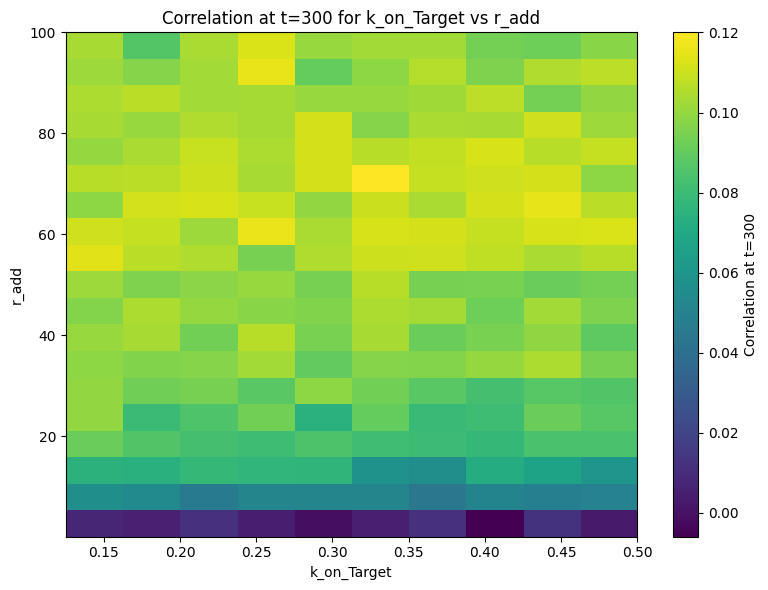

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume df["300"] contains tuples like (corr, pval)
# Extract unique sorted values for axes
k_on_values = np.sort(df['k_on_Target'].unique())
r_add_values = np.sort(df['r_add'].unique())

# Initialize heatmap matrix
heatmap_data = np.full((len(r_add_values), len(k_on_values)), np.nan)

# Fill matrix with correlation (not p-value)
for _, row in df.iterrows():
    i = np.where(r_add_values == row['r_add'])[0][0]
    j = np.where(k_on_values == row['k_on_Target'])[0][0]
    corr, _ = row[300]  # extract correlation from tuple
    heatmap_data[i, j] = corr

# Plot using imshow
plt.figure(figsize=(8, 6))
im = plt.imshow(heatmap_data, aspect='auto', origin='lower',
                extent=[k_on_values.min(), k_on_values.max(), r_add_values.min(), r_add_values.max()])
plt.colorbar(im, label='Correlation at t=300')
plt.xlabel('k_on_Target')
plt.ylabel('r_add')
plt.title('Correlation at t=300 for k_on_Target vs r_add')
plt.tight_layout()
plt.show()


/tmp/ipykernel_2650057/2540304103.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('Blues_r')


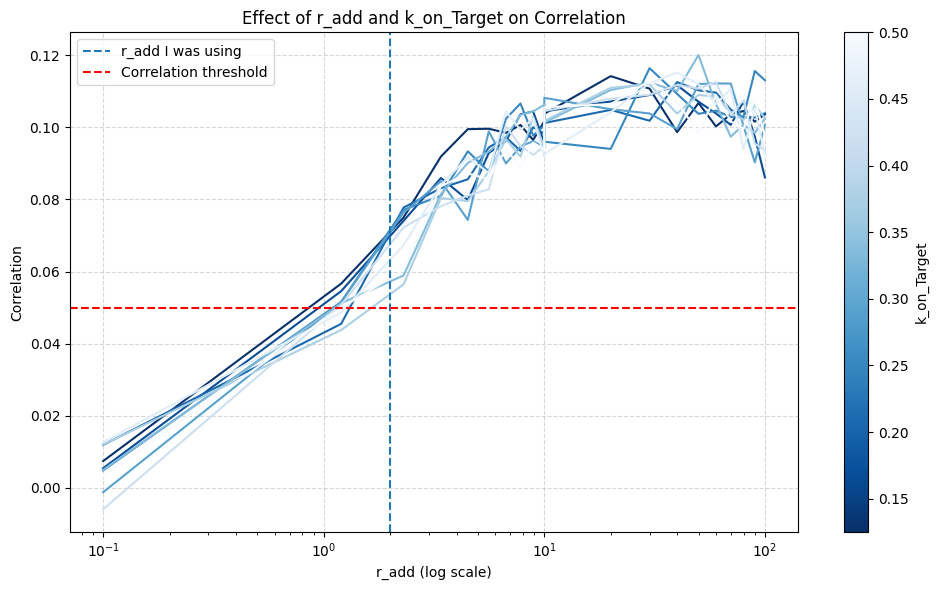

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize

# Create figure and axes explicitly
fig, ax = plt.subplots(figsize=(10, 6))

# Sorted unique k_on_Target values
k_on_values = np.sort(df['k_on_Target'].unique())

# Set up colormap
cmap = get_cmap('Blues_r')
norm = Normalize(vmin=k_on_values.min(), vmax=k_on_values.max())

# Plot each line with color from colormap
for k_on in k_on_values:
    subset = df[df['k_on_Target'] == k_on].sort_values('r_add')
    correlations = subset[300].apply(lambda x: x[0])
    
    ax.plot(subset['r_add'], correlations, 
            # label=f'{k_on:.3f}', 
            color=cmap(norm(k_on)))

# Axis labels and title
ax.set_xlabel('r_add (log scale)')
ax.set_ylabel('Correlation')
ax.set_title('Effect of r_add and k_on_Target on Correlation')
ax.grid(True, linestyle='--', alpha=0.5)
ax.axvline(2, label = "r_add I was using", linestyle = "--")
ax.axhline(0.05, color = "red", label = "Correlation threshold", linestyle = "--")
ax.set_xscale('log')
# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, label='k_on_Target')
plt.legend()
plt.tight_layout()
plt.show()


In [76]:
df[df['k_on_Target'] == 0.125].sort_values("r_add")

,index,300,600,k_on_TF,k_off_TF,burst_size_TF,k_on_Target,k_off_Target,burst_size_Target,splicing_half_life_minutes,...,mrna_half_life_Target,protein_half_life,r_add,n,protein_production_rate,labeling_efficiency,pulse_time,num_cells,dynamics,capture_efficiency
96,0,"(0.007440032782870526, 0.1367559973598417)","(0.01662518363698696, 0.0008836698200492437)",0.27,8.4,32,0.125,7.7,40,7,...,3.7,28,0.1,2,0.059,1,60,20000,MM,1
97,1,"(0.05665792536521374, 8.282160609940433e-30)","(0.056430238352605855, 1.3938712232766748e-29)",0.27,8.4,32,0.125,7.7,40,7,...,3.7,28,1.2,2,0.059,1,60,20000,MM,1
98,2,"(0.0749766738267308, 5.768179468688494e-51)","(0.07907046026738783, 1.690704091712528e-56)",0.27,8.4,32,0.125,7.7,40,7,...,3.7,28,2.3,2,0.059,1,60,20000,MM,1
99,3,"(0.09189927838504486, 9.376034201393078e-76)","(0.07808480876864787, 3.865546026198716e-55)",0.27,8.4,32,0.125,7.7,40,7,...,3.7,28,3.4,2,0.059,1,60,20000,MM,1
100,4,"(0.09948527805685968, 1.6259831407507793e-88)","(0.08396367281489274, 1.6860694625214606e-63)",0.27,8.4,32,0.125,7.7,40,7,...,3.7,28,4.5,2,0.059,1,60,20000,MM,1
101,5,"(0.09960447968559331, 1.0055737887468487e-88)","(0.09455663439742633, 4.15435135082369e-80)",0.27,8.4,32,0.125,7.7,40,7,...,3.7,28,5.6,2,0.059,1,60,20000,MM,1
102,6,"(0.09846732459275614, 9.617265162574542e-87)","(0.08459502441276817, 1.962129796437063e-64)",0.27,8.4,32,0.125,7.7,40,7,...,3.7,28,6.7,2,0.059,1,60,20000,MM,1
103,7,"(0.10064710292304735, 1.4660193455923986e-90)","(0.09494107610132382, 9.512099070307737e-81)",0.27,8.4,32,0.125,7.7,40,7,...,3.7,28,7.8,2,0.059,1,60,20000,MM,1
104,8,"(0.09647947565831184, 2.4546024334504657e-83)","(0.0934158391343581, 3.183004846284235e-78)",0.27,8.4,32,0.125,7.7,40,7,...,3.7,28,8.9,2,0.059,1,60,20000,MM,1
105,9,"(0.10170263742818152, 3.9057838653771115e-47)","(nan, nan)",0.27,8.4,32,0.125,7.7,40,7,...,3.7,28,10.0,2,0.059,1,60,20000,MM,1


In [89]:
0.125*(16)

2.0